# Welcome to Machine Learning - Week 10
Instructor - Daniel Wiesenfeld

# Deep Learning for Sequential Data

## Contents
- Embedding Layers
- Recurrent Neural Networks
- LSTMs & GRUs
- Transformers & Self Attention Mechanism
- Tasks and Models

## Next Word Prediction
Imagine a scenario in which we are trying to predict the next word in a sentence:

*"I don't have her phone number, so I'll try to send her an ______"*

- What do you think the next word is?

- Why do you think that?

- How do we design a model that allows us to capture all the information necessary to guess the next word?


## The Problem with Text

- It's categorical with extremely high cardinality (> 150K words in English)
- The meaning of the same word can vary with context e.g. *"We've got a mouse in the house" vs. "I'd prefer a bluetooth mouse to a wired one"*
- The position of words and punctuation can change the meaning "The shirt is too big." vs. "Is the shirt too big?"
- Words can be negated by other words, somethimes in an inconsistent fashion, especially when processign colloquial text: e.g.
     - "I didn't hurt anybody" vs. "I didn't hurt nobody"
     - "The movie was bad" vs. "The movie was not bad" vs. "The movie was great" vs. "The movie was not great"
- In long text sequences, the meaning of some words can only be determined by context from many time steps ago.


## Words as Categorical Values
- One hot encode them? Why or Why not?
- Integer encode them? Why or Why not?

## Embeddings
Let's look at people words: {grandfather, adult, man, woman, child, boy, girl, infant}

Let's try to enclode each word with as two numerical values, one representing age and one representing gender.

The resulting graph might look like this:

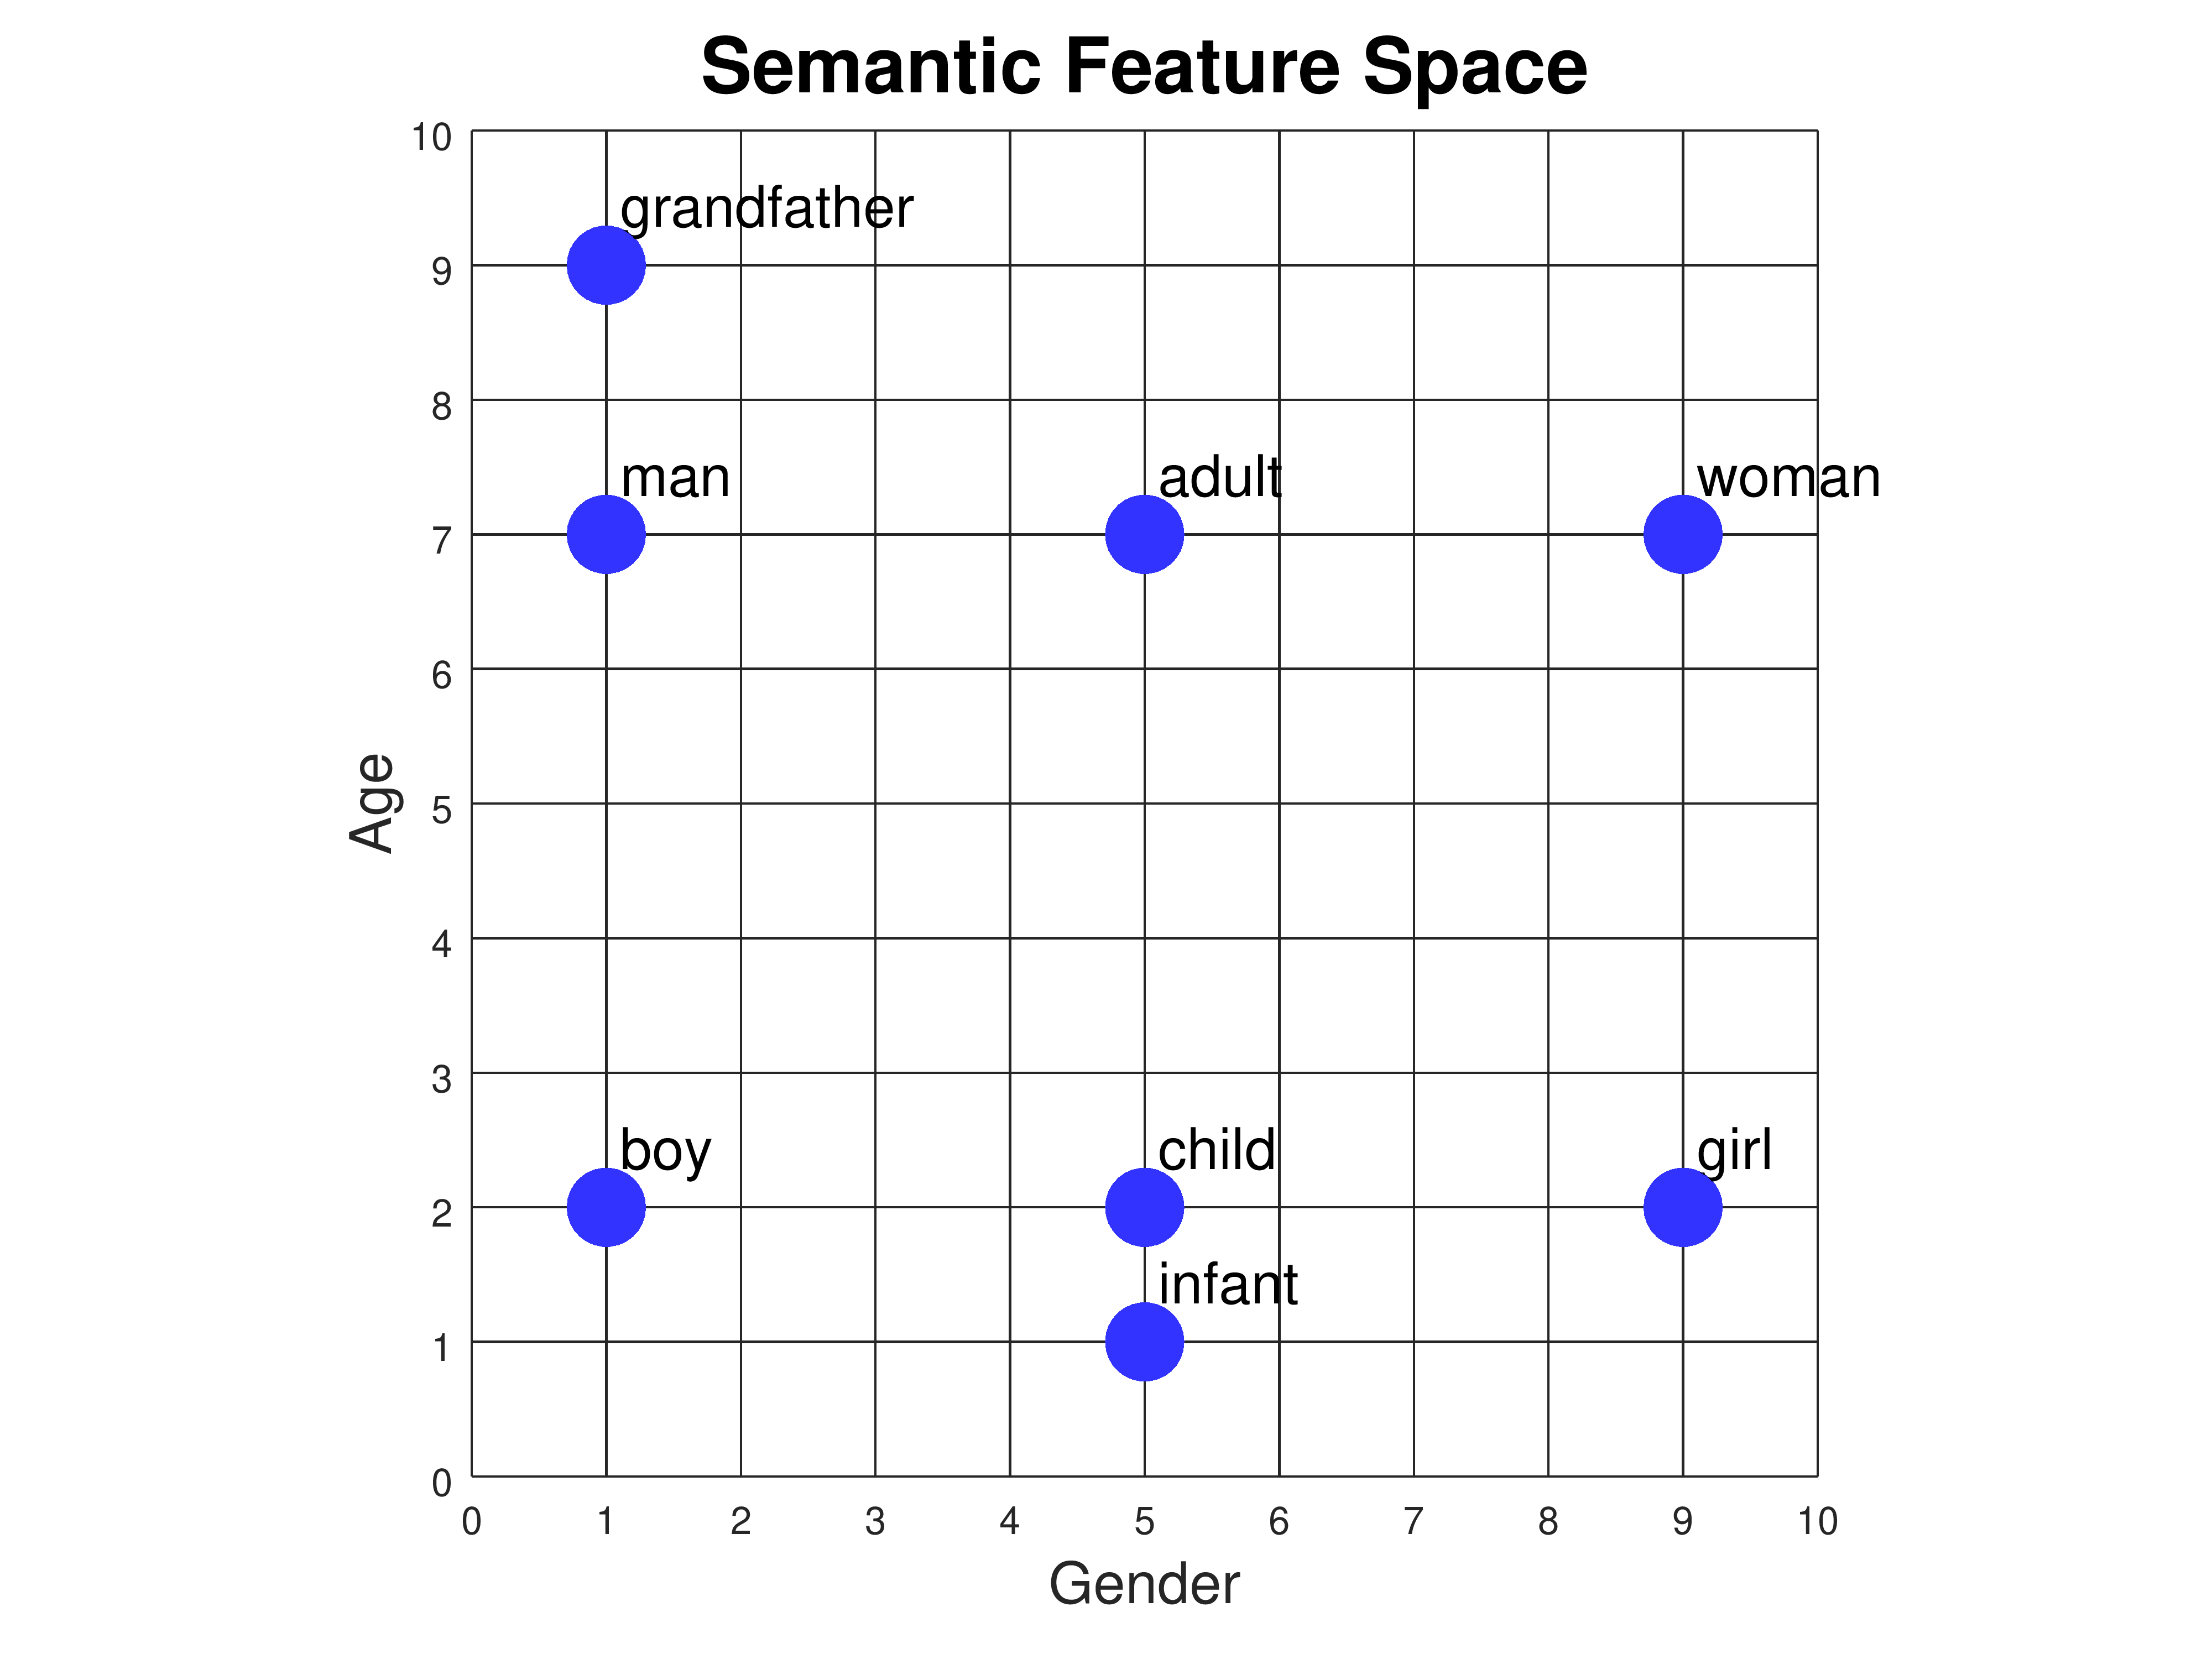


I could use euclidean distance to detrmine how similar words are too each other.

But Euclidean distance has a complicated formula: $\sqrt{(\text{age}_1 - \text{age}_2)^2 + (\text{gender}_1 - \text{gender}_2)^2}$


An alternative would be to measure the size of the angle between lines drawn to each point from the center:

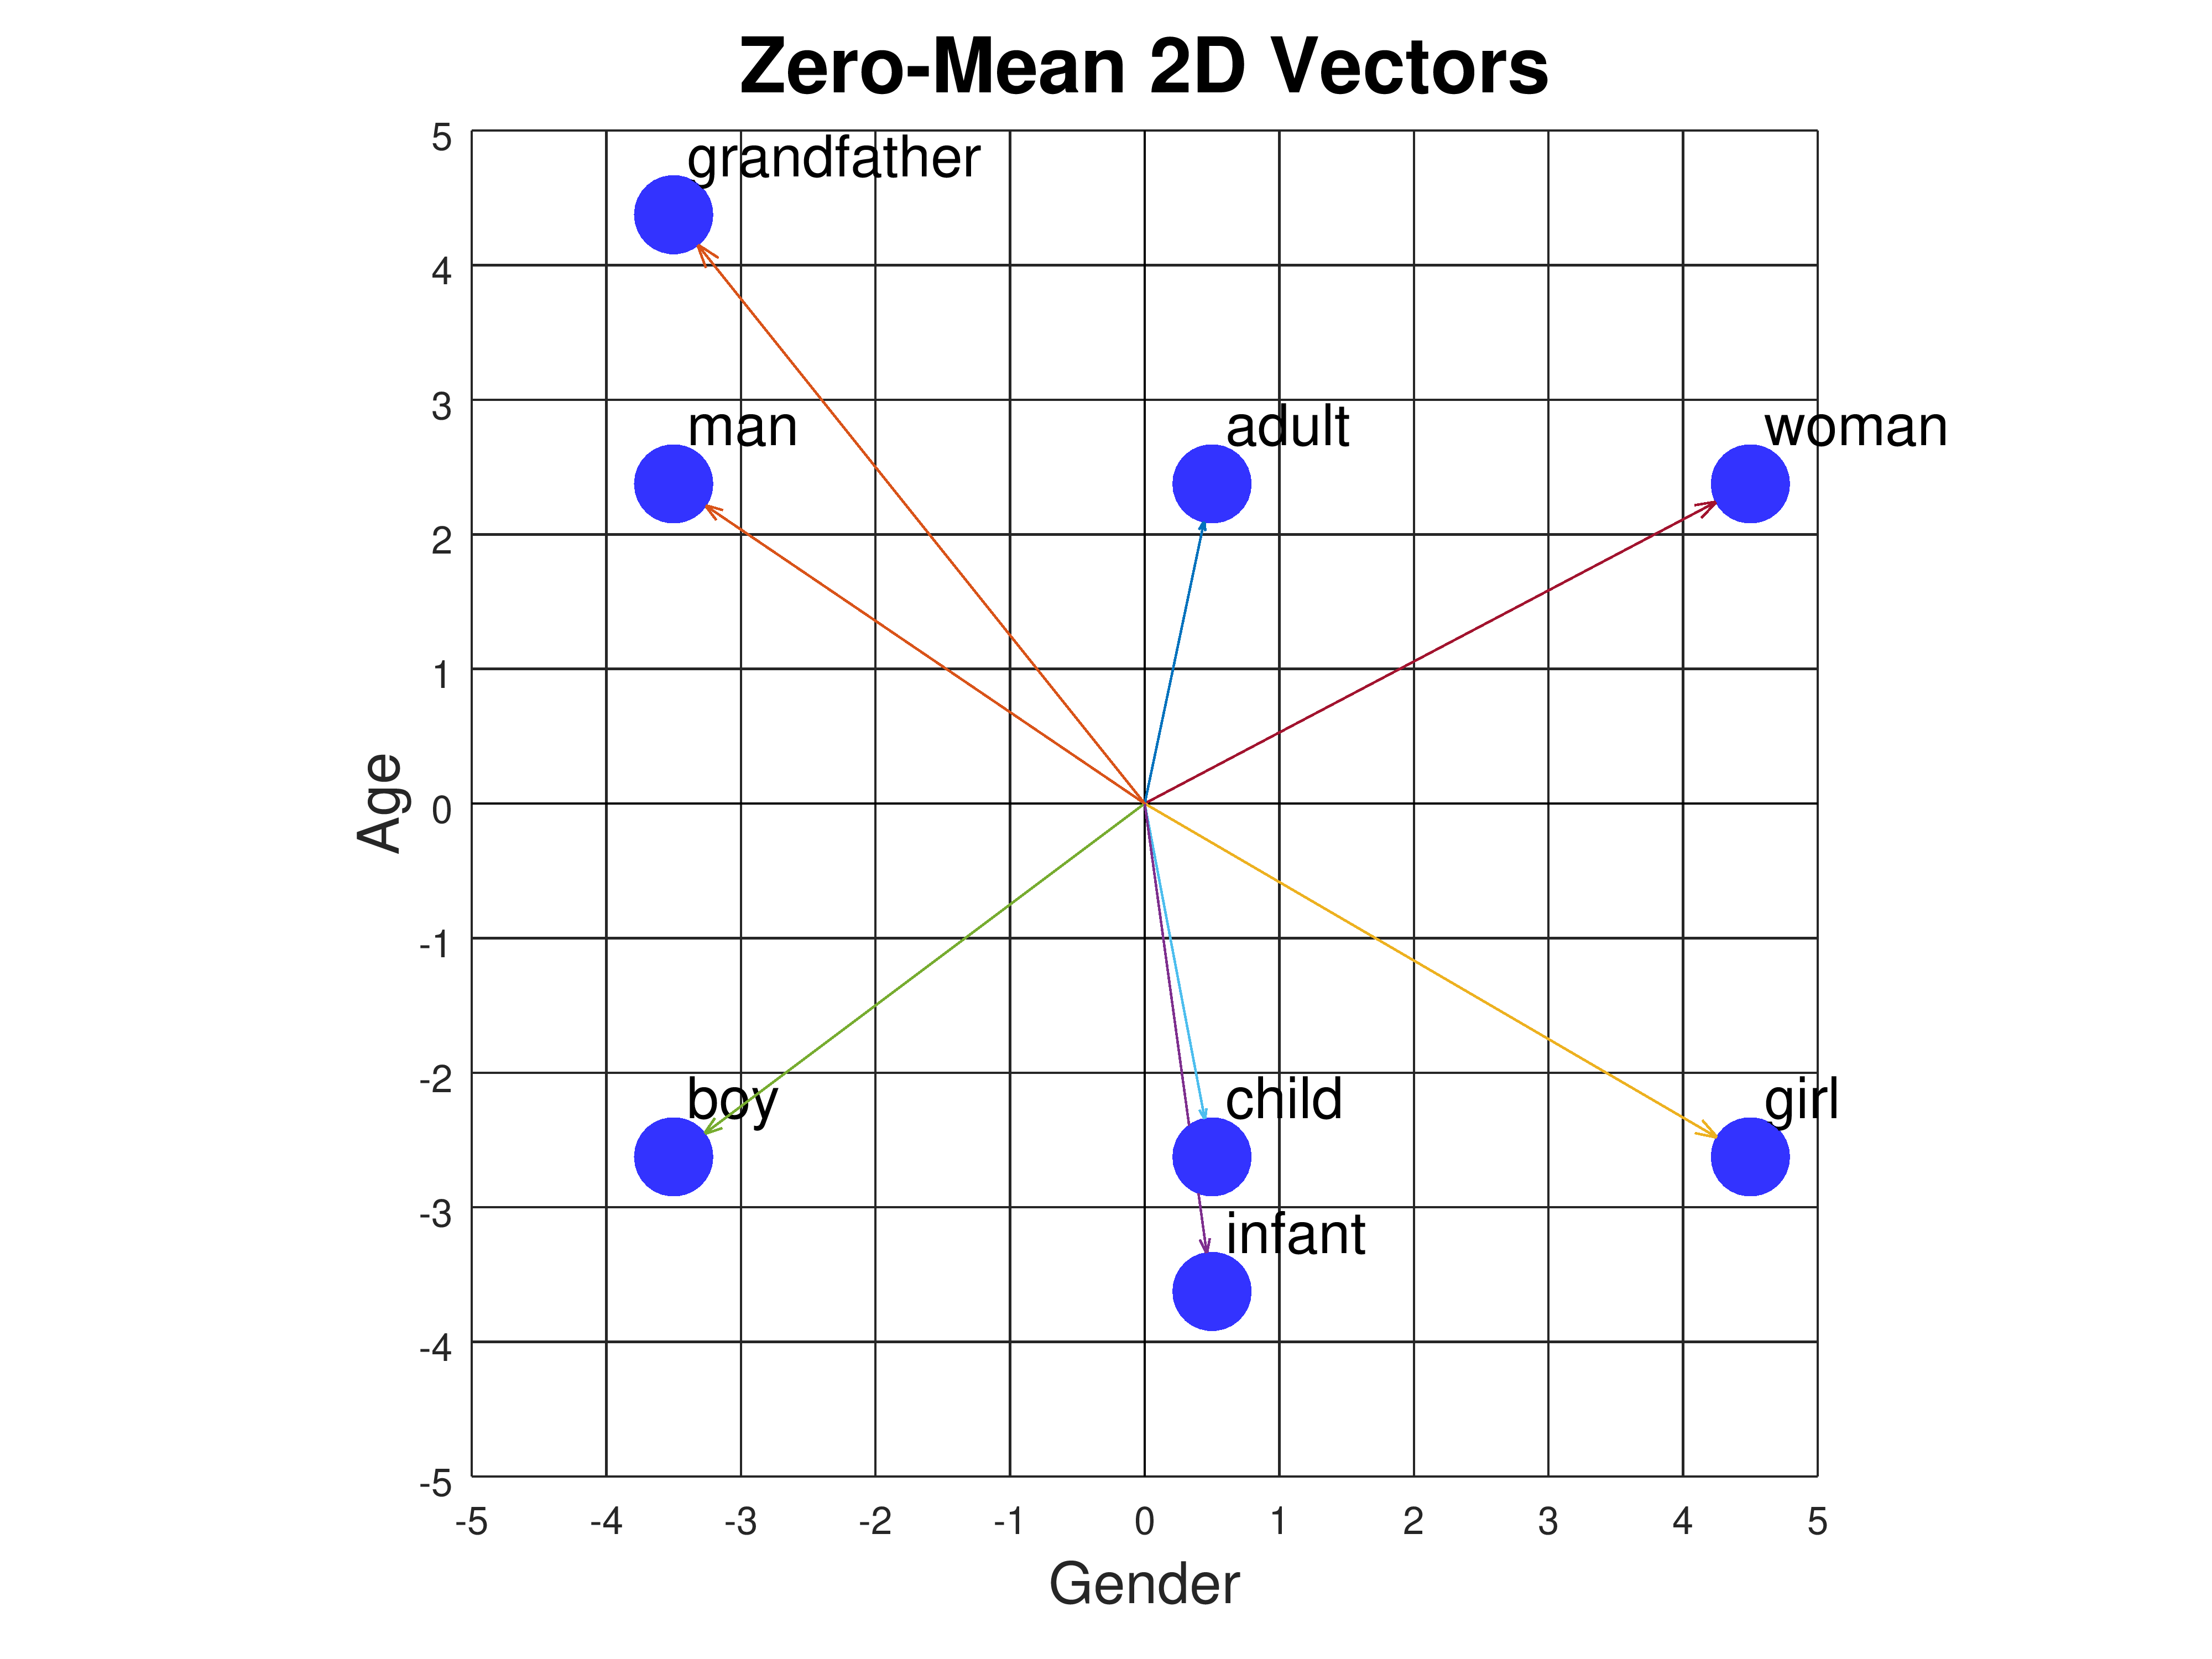

The smaller the angle, the closer the two tings are semantically.

One way to measure the smallness of an angle is the cosine. Recall that: $\cos(0) = 1$ and $\cos(90^\circ) = \cos(\frac{\pi}{2}) = \cos(\frac{\tau}{4}) = 0$

Now in the graph aboce, each point can be represented as a length-2 vector: $<\text{gender},\space\text{age}>$

The cosine of the angle between two vectors $u$ and $v$ is: $\frac{u \cdot v}{\lVert u \rVert \lVert v \rVert}$

Of course computing the magnitude of each vector for the denominator is just as hard as computing the euclidean distance, but if we force each vector to have a length of 1, that solves that.

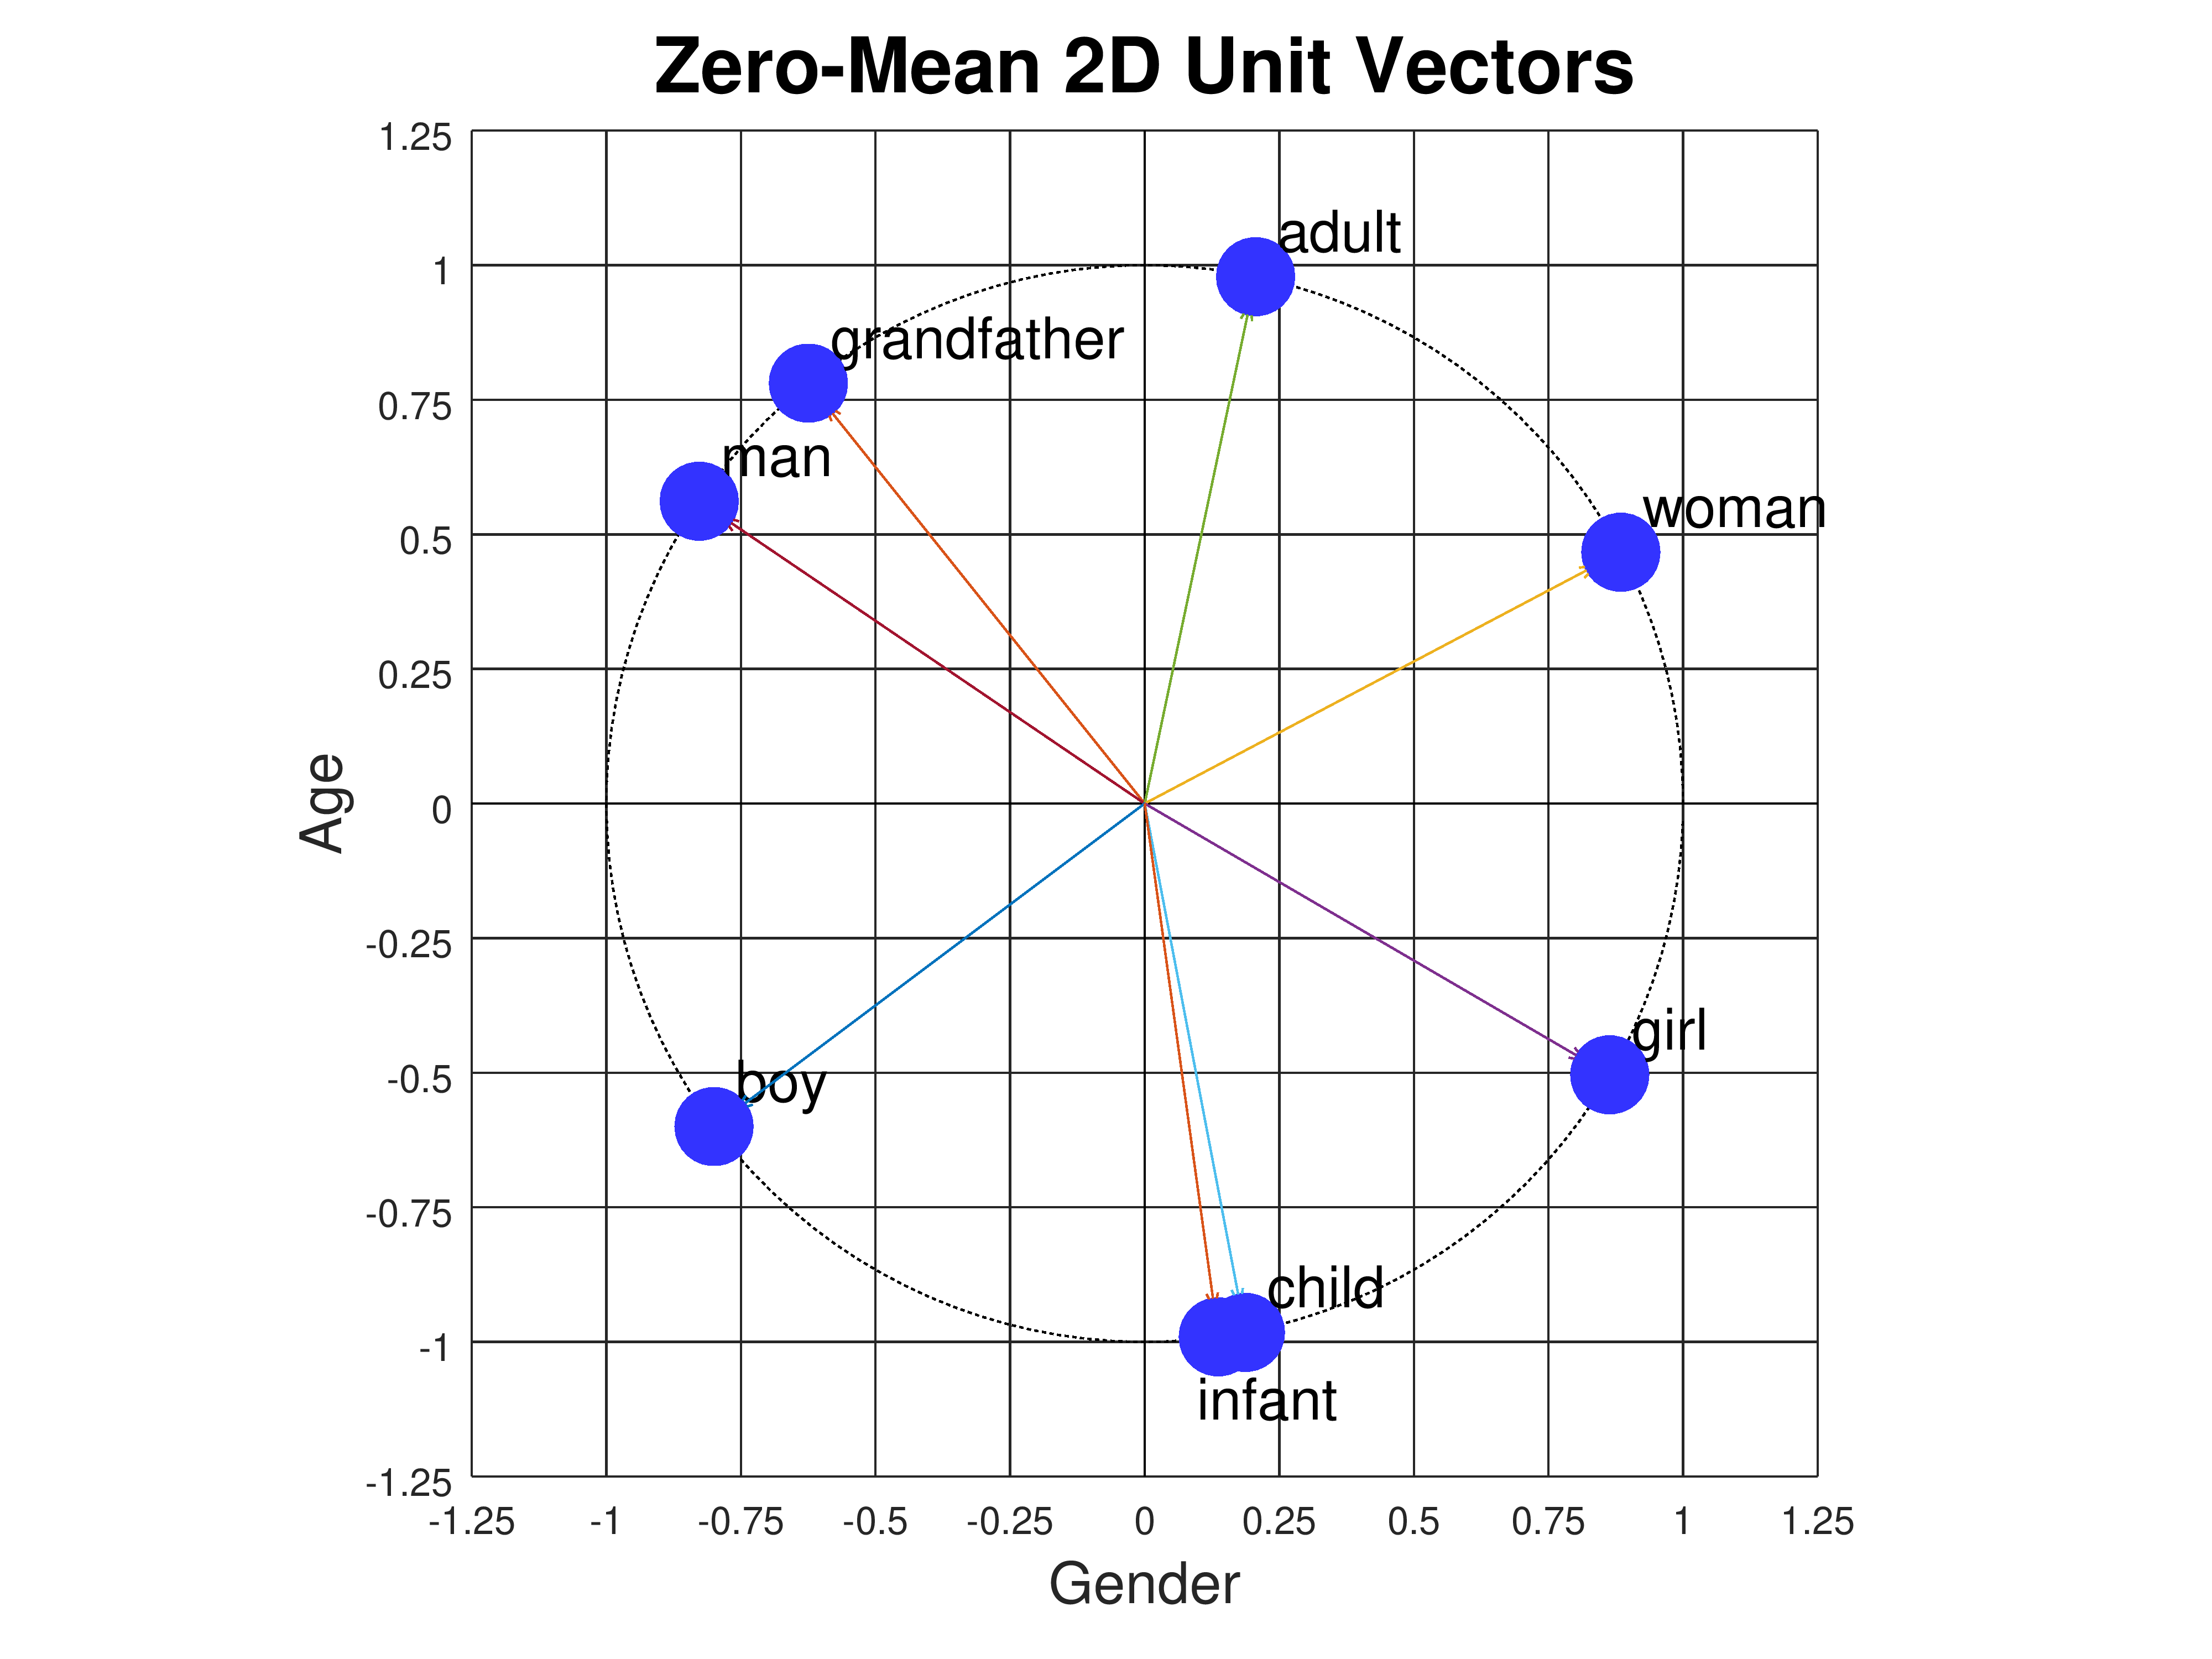

This representation is not perfect, but it does allow us to very quickly get a sense of how similar two classes are by just taking the dot product of their vectors. The closer to 1, the more similar they are.

How would you add the following words to this: {king, queen, monarch, prince, princess}

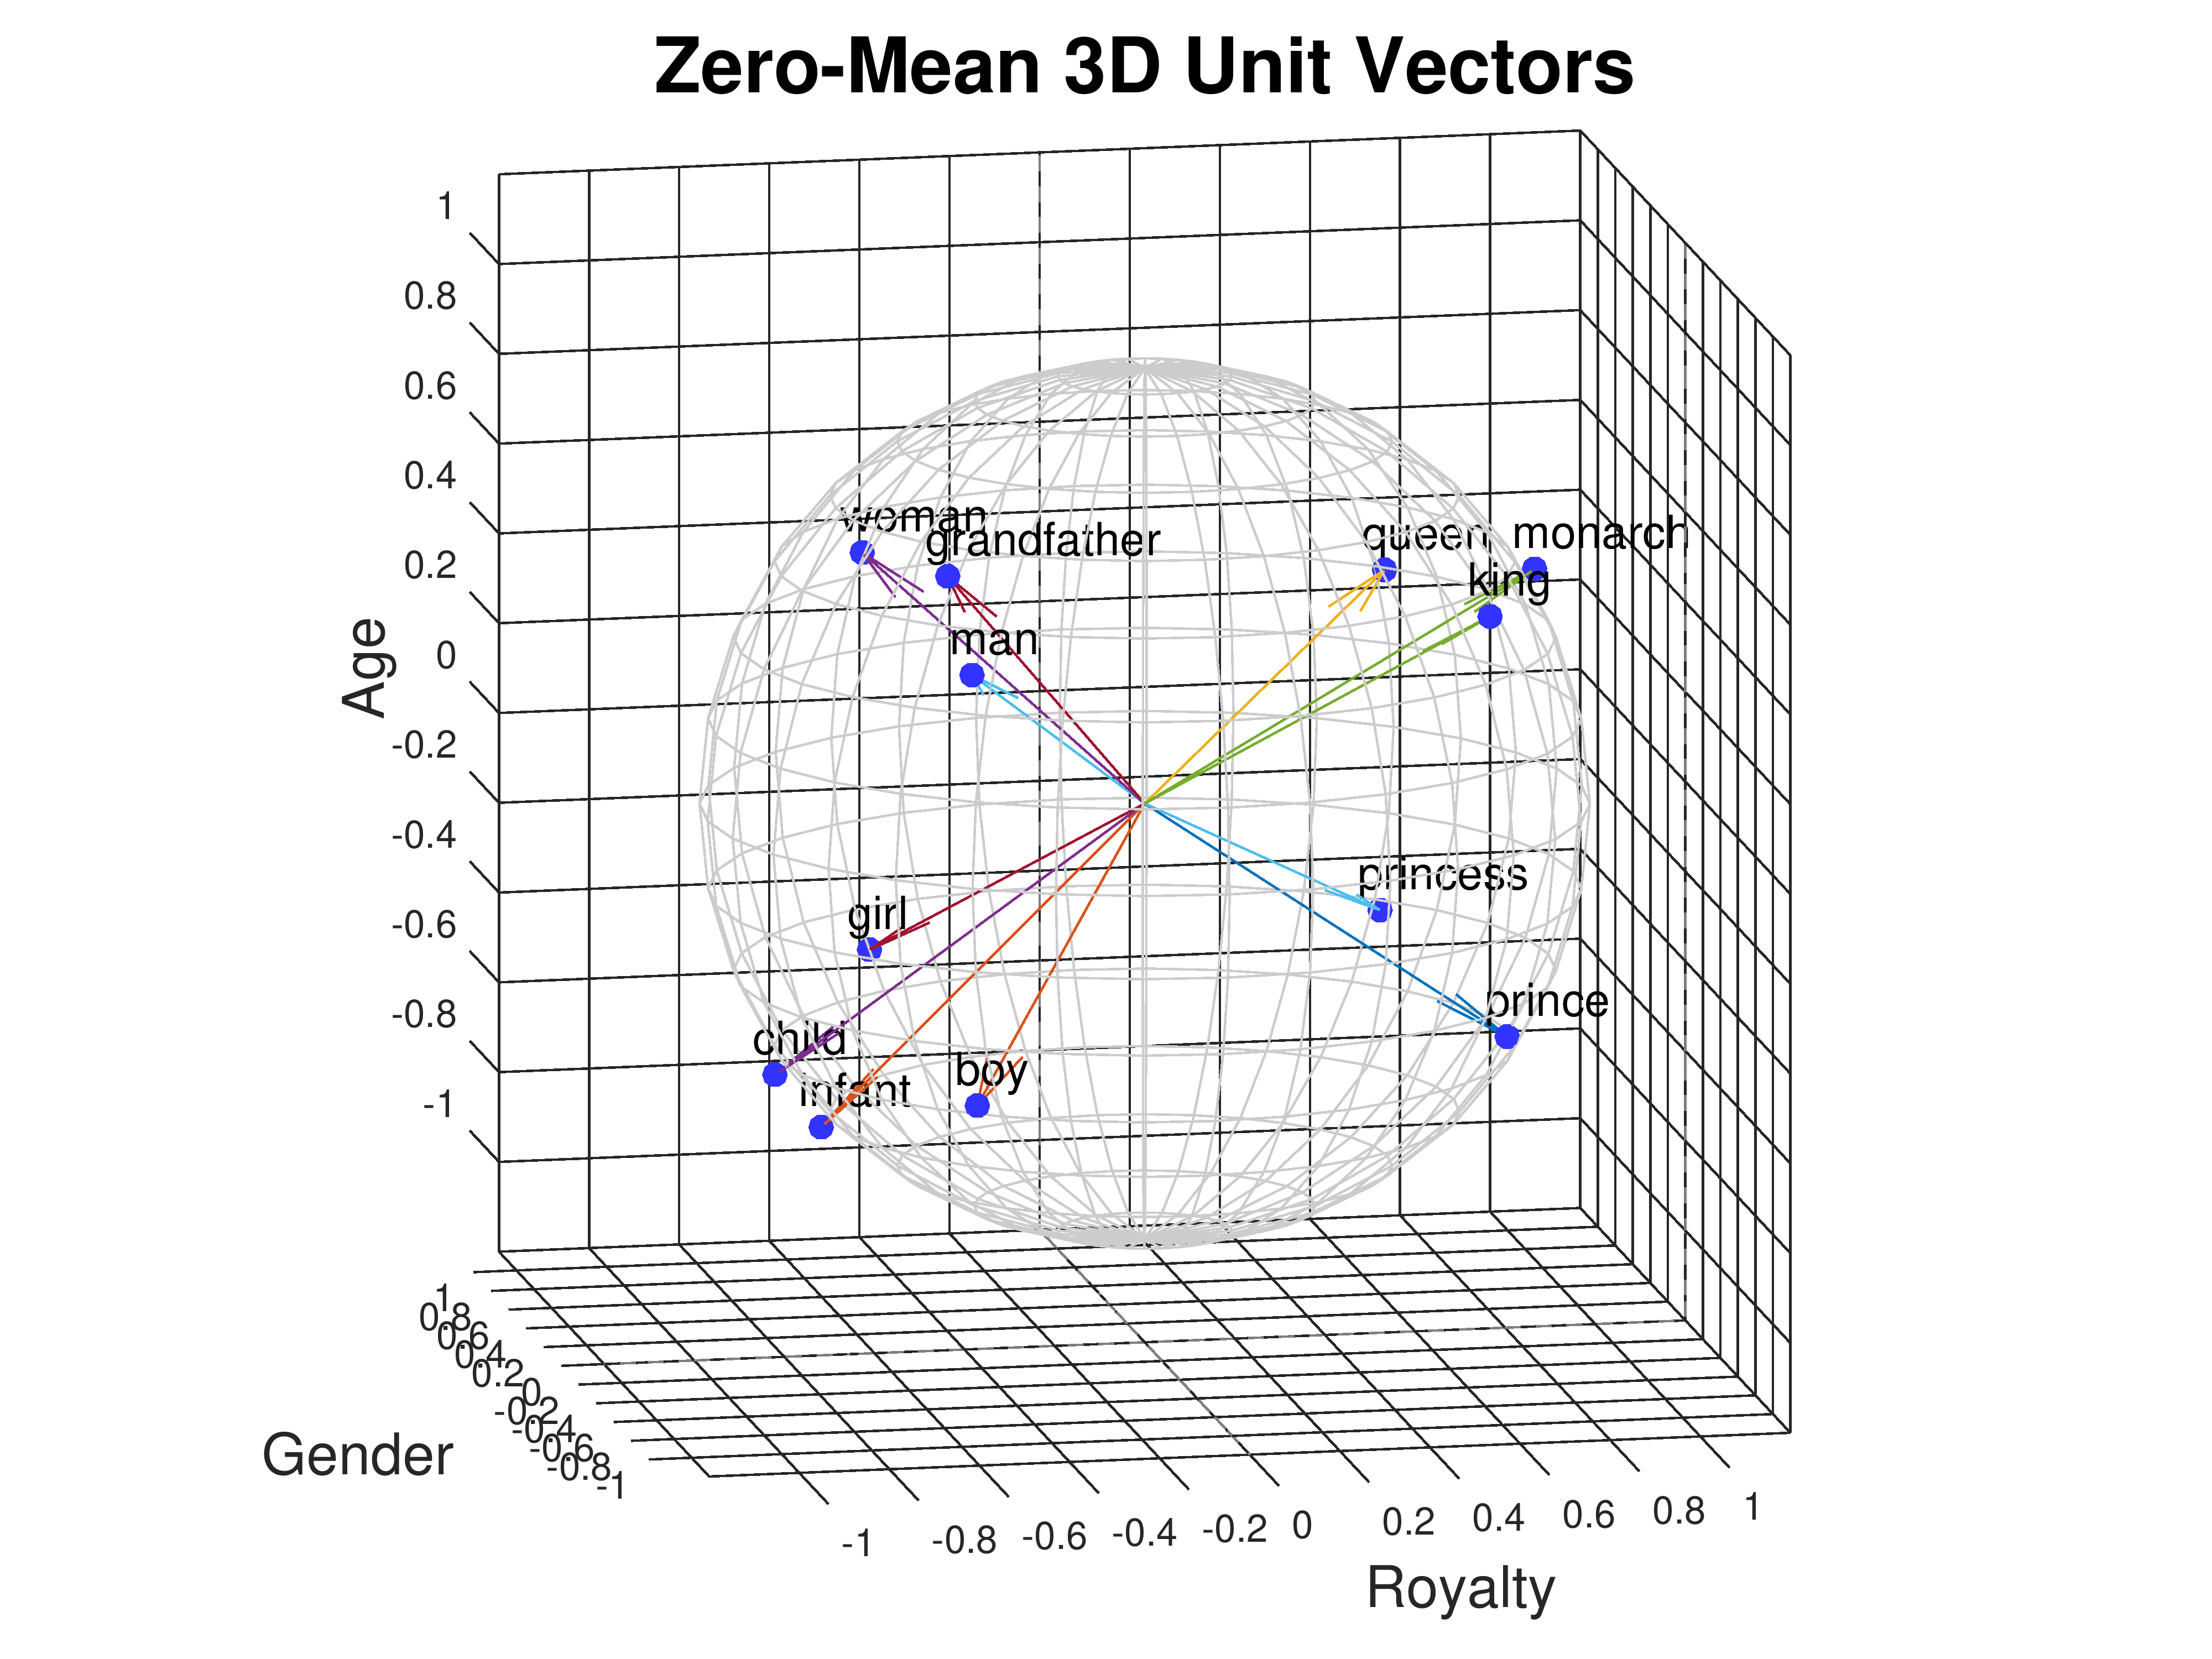
*source: https://www.cs.cmu.edu/~dst/WordEmbeddingDemo/tutorial.html*

## Embeddings - Definition and Concepts 

### Definition
Dense vector encoding of data that capture their semantic meaning, especially in regards to the relations between values and classes

### Key Concepts of Embeddings:

- **Dense Representation:** Traditional methods of representing words, such as one-hot encoding, result in sparse and high-dimensional vectors where each word is represented by a vector with all zeros except for a single one. Embeddings, on the other hand, map words to dense, lower-dimensional vectors where each word is represented by a continuous-valued vector.
     

- **Semantic Meaning:** Embeddings capture semantic relationships between words. Words with similar meanings or that are used in similar contexts tend to have vectors that are close to each other in the embedding space. For example, the words "king" and "queen" might have similar vectors because they share similar semantic properties.
     

- **Learned from Data:** Embeddings are typically learned from large corpora of text data using algorithms such as Word2Vec, GloVe, or through neural network models like BERT and GPT. These algorithms adjust the vectors during training to minimize a loss function that captures the semantic similarity between words.
     

- **Dimensionality:** The dimensionality of an embedding vector is a hyperparameter that needs to be set before training. Common choices range from 50 to 300 dimensions, but modern models can use even higher-dimensional embeddings.


- **Contextual vs. Static Embeddings:**

    - **Static Embeddings:**
         Models like Word2Vec and GloVe produce static embeddings where each word has a single vector representation regardless of context.




    - **Contextual Embeddings:** Models like BERT produce contextual embeddings where the representation of a word depends on the context in which it appears. For instance, the word "bank" will have different embeddings in the sentences "He sat on the river bank" and "She went to the bank to deposit money."


In [20]:
!pip install spacy
!python -m spacy download en_core_web_md

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 12.1/12.1 MB 5.5 MB/s eta 0:00:00
     -------------------------------------- 481.9/481.9 kB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 50.3/50.3 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 47.2/47.2 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 6.3 MB/s eta 0:00:00
     ------------------------------------- 182.0/182.0 kB 10.7 MB/s eta 0:00:00
     -------------------------------------- 122.2/122.2 kB 7.0 MB/s eta 0:00:00
     ---------------------------------------- 5.4/5.4 MB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 6.6/6.6 MB 3.7 MB/s eta 0:00:00
     -------------------------------------- 240.7/240.7 kB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 47.3/47.3 kB ? eta 0:00:00
     -------------------------------------- 152.4/152.4

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 42.8/42.8 MB 8.0 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [42]:
mouse = get_spacy_embedding('mouse')
print(mouse.shape)
mouse

(300,)


array([ 8.94438475e-03,  1.20615780e-01, -2.86482703e-02, -4.59487662e-02,
        8.78670961e-02, -1.80324465e-02, -2.03400552e-02,  3.91584681e-03,
       -7.43783489e-02,  1.29855394e-01,  1.42650887e-01,  4.95811924e-02,
       -9.29319263e-02,  8.60935226e-02,  3.72755565e-02, -3.67004052e-02,
       -5.65311359e-03, -4.41336483e-02, -1.02318067e-03, -3.82137336e-02,
       -1.15986140e-02,  1.76832005e-02, -4.00332287e-02, -7.80588910e-02,
       -4.20823433e-02, -2.65488569e-02, -8.01714212e-02, -1.14195077e-02,
        1.70914270e-02,  5.32879755e-02,  2.93065272e-02,  3.93224880e-03,
        1.40903564e-03, -9.62428842e-03, -5.17484024e-02, -5.45191914e-02,
        6.56285975e-03,  4.68869433e-02,  1.32626191e-01,  4.98370565e-02,
        2.45894026e-02, -5.74058890e-02, -2.74192393e-02,  3.70656177e-02,
        7.33505115e-02,  6.41458854e-03,  2.42985450e-02, -7.09099397e-02,
       -7.32236728e-02, -1.00360803e-01, -4.39390133e-04,  1.19091526e-01,
        1.27583221e-02,  

In [43]:
sim('mouse', 'rat')

0.55991685

In [44]:
sim('mouse', 'keyboard')

0.5482671

In [49]:
sim('mouse', 'vole')

0.5109128

In [50]:
sim('keyboard', 'vole')

0.046663195

In [51]:
sim('keyboard', 'rat')

-0.007157471

In [52]:
sim('bank', 'money')

0.4629761

In [53]:
sim('bank', 'river')

0.3702722

In [54]:
sim('river', 'money')

0.1297628

### 3 Ways to use Embedding Layers in your Models
1) Learn them on the fly: randomly intialize embeddings and learn the best embedding weights as your model learns
2) Use pretrained embeddings: Download pretrained embeddings and don't let your model change them
3) Finetune pretrained embeddings: Initialize your model with pretrained embeddings and also let your model adjust them as it learns its task

### Embeddings for All Things
We mostly focused on using embeddigns for words, but embeddings can be used for any discrete variable, categorical or otherwise which may have difficult to capture meaning. You can embed an entire sentence, you can embed any categorical variable, images, documents, websites, entities, etc.

How many dimensions should your embeddings have?

- The 4th root of the cardinality of your feature according to a google course: https://developers.googleblog.com/en/introducing-tensorflow-feature-columns/
- min(600, round(1.6 * n_cat ** .56) According to Jeremy Howard of fast.ai

## Tokenization

I've been using the term "word" to describe a unit of text. However most languate models actually use what's known as subword tokens rather than words. A token could be a word or a piece of a word. There are many different token schemes out there. If you use a pretrained model, make sure to use a compatible tokenizer.

Often common prefixes and suffixes get their own tokens so that the model can figure out word meanings by treating root words and prefixes/suffixes seperately. This reduces the size of the of the dictionary. It also helps it guess at meanins of words that it doesn't know at all.

In [58]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to tokenize a sentence into subword tokens
def tokenize_sentence_bert(sentence):
    return tokenizer.tokenize(sentence)

# Example usage
sentence = """
    I didn't mean to pregame, but my buddy showed up and we just had to have a l'chaim before the shalom zachar, 
    now I'm kind of inebriated.
"""
tokens = tokenize_sentence_bert(sentence)
print(tokens)

['i', 'didn', "'", 't', 'mean', 'to', 'pre', '##game', ',', 'but', 'my', 'buddy', 'showed', 'up', 'and', 'we', 'just', 'had', 'to', 'have', 'a', 'l', "'", 'cha', '##im', 'before', 'the', 'sha', '##lom', 'zach', '##ar', ',', 'now', 'i', "'", 'm', 'kind', 'of', 'in', '##eb', '##riated', '.']


# Sequential Neural Networks

## Recurrent Neural Networks:

- Recurrent neural networks operate over a sequence, one item at a time.
- Each RNN cell takes two inputs - the input item (or its embedding) and the hidden state of the RNN cell for the previous item
- It combines those two inputs, perfrorms some non linear activation, and then outputs two outputs: An output for prediction and a hidden state to be used as an input for the next cell

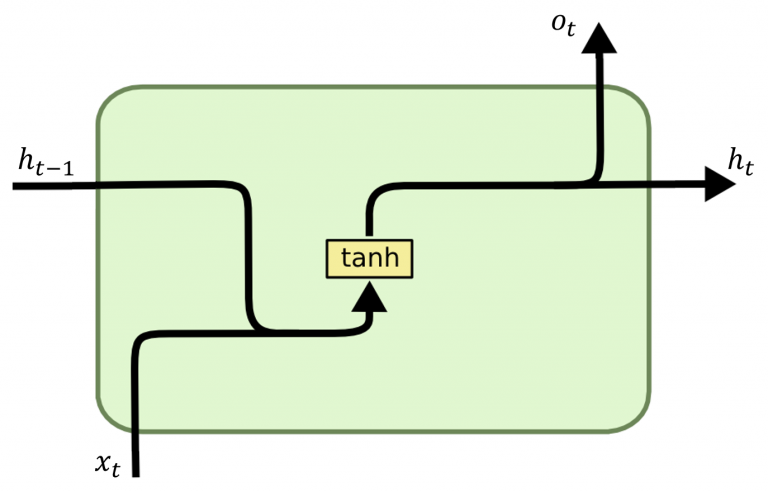

*source: http://dprogrammer.org/rnn-lstm-gru?source=post_page-----cc53e7475980--------------------------------*


 The architecture, and which inputs and outputs we care about depend on the specific task.
 
- one-to-one: This s a single RNN cell takes in a single input vector but no previous hidden state, and outputs an output vector or value, but no hidden state. It is identical to a feed forward neural network
 
- one-to-many: This RNN takes a single input and feeds that into the first RNN cell. It captures the output from that cell and feeds the hidden vector from that cell into the next cell. Each subsequent cell only gets the hidden vector from the previous cell as it's input. This is used to generate text from a single input, such as an image.
 
- many-to-one: Each RNN cell gets its own input plus the hidden vector of the previous cell. We ignore all outputs except the last cell. This is uses for text classification,
 
- many-to-many (sequential): In this one, we ignore all outputs until we run out of inputs, then we capture the outputs. This can be used for time series prediction, sentence completeion, etc. It can also be used for translation or summarization tasks, but the input and output models would typically be separate models.
 
- many-to-many (synchronized): I this one each cell has its own input and we capture each cell's output. It might be to classify each frame of a video, or to classify each word of a sentence, or any other type of sequence to sequence task where each item in the input sequence has a corresponding item in the output sequence.
 
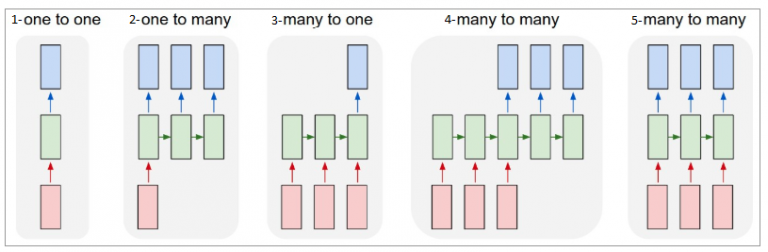

## Problems with RNNs

- The point of the hidden state in RNNs is to keep a memory of earlier elements of the sequence to inform later predictions
- However in practice it did not work for long sequences
- Also, there were issues of exploding and vanishing gradients


## Solution 1: LSTM (Long Short Term Memory)

- Two hidden states one called the memory cell is meant to keep long term memory
- The other hidden state is analogous to the hidden state in a regular RNN
- Gates are vectors with values between 0 and 1 that decide how much of any vector to keep
    - Forget Gate: how much of the memory to keep
    - Input Gate: how much of the combined input/hidden to add to the memory
    - Output Gate: how much of the combined input/hidden to combine with memory to produce next hidden and output vectors
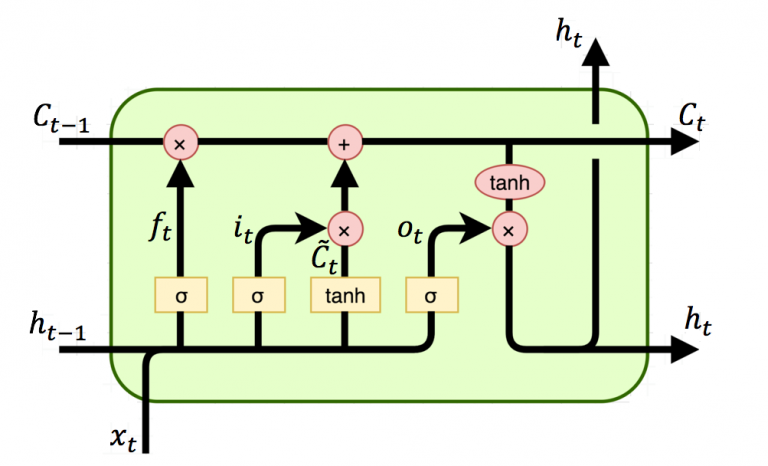

LSTMs worked well in practice and were considered state of the art until transformers came along. They are still used today.

## Solution 2: Gated Recurrent Units (GRUs)
- GRUs are similar to LSTMs but are simpler and keep the single hidden output structure of basic RNNs
- They tend to perform similarly to LSTMs and sometimes even beat them, but are usually considered slightly less powerful (but significantly lighter weight)
- They have two gates:
    - Reset gate: how much of the previous hidden + current input to forget
    - Update gate: how much of the previous hidden + current input to keep
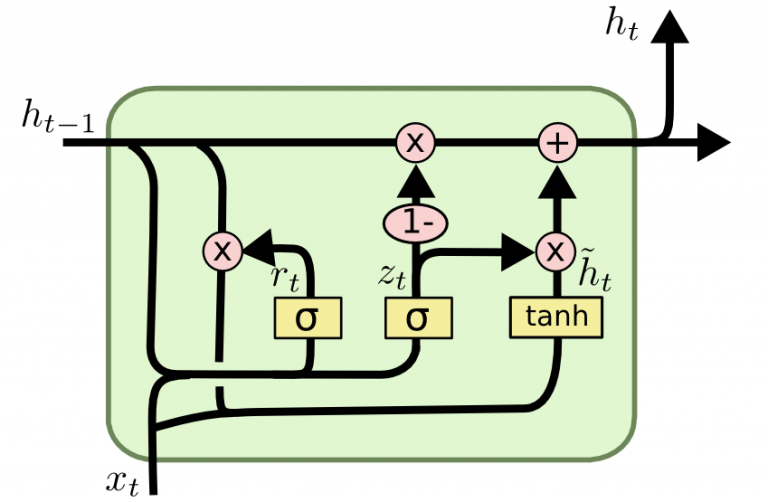


## Transformers

One problem with LSTMs and GRUs was that despite their improved abilities to maintain long term memory, they still forgot alot. They had a hard time retaining long term dependencies. This was especially true in sequence to sequence models that used an encoder model to convert an input sequence into a final hidden state and a decoder model that took in the final hidden state of the encoder model as its input and recurrently generated an output. Translation and summarization often used these mdoels, and they often failed when important input words were early in a long sequence.

Researched came up with the "attention mechanism" a technique to feed past hidden states into each cell that would enable the current cell to directly attend to past inputs (rather than just whatever information was captured in the hidden vector). 

In each cell, the previous hidden vectors are each given an importance weight, based on how important that hidden vector is for that particular cell. It can then produce a context vector which is the weighted sum of all previous hidden vectors (weighted by their importance to the cell in question). The context vector of the last cell of the encoder model now has much richer information than the hidden vector alone. Both are fed into the decoder mdoel. This was referred to as self-attention, and enabled the model to attend to much longer range dependencies.

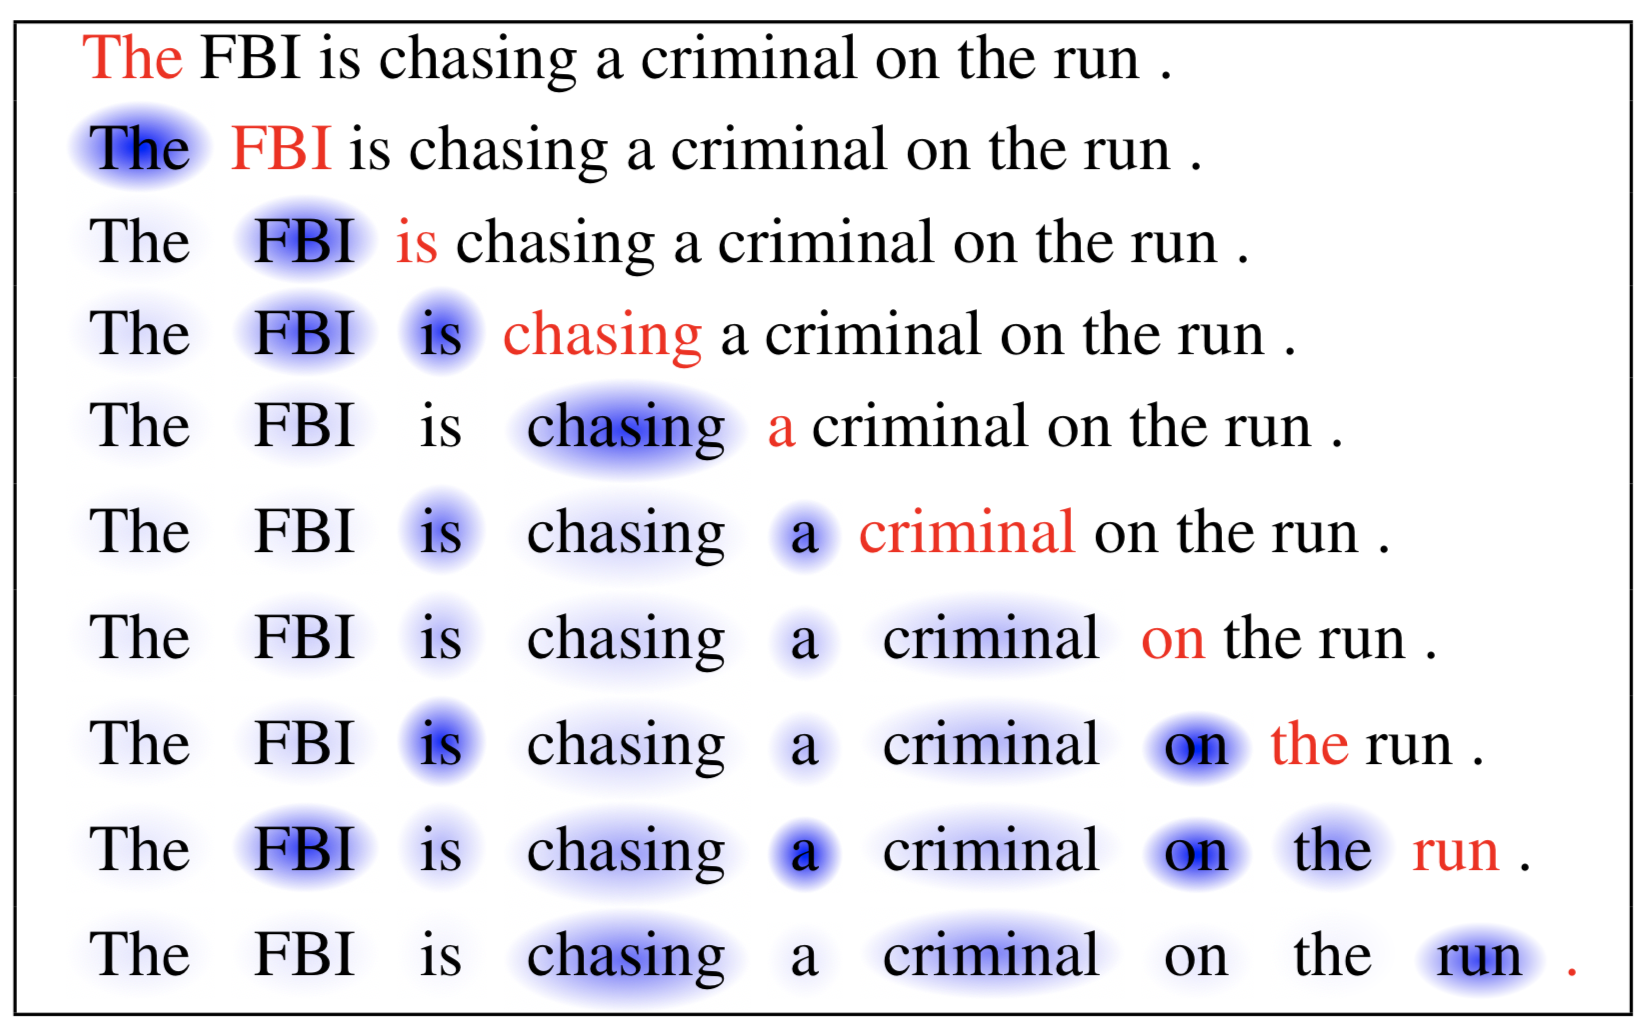
*source: https://slds-lmu.github.io/seminar_nlp_ss20/attention-and-self-attention-for-nlp.html*

This worked well, but made models very complex. The complexity necessated parallel computing (simultaneous computation on many computers), but the recurrent nature of RNNs, LSTMs, GRUs etc, made parallelization impossible because each cell relied on the output of the previous cell.


In 2017 Google researchers published a ground breaking paper called "Attention is all you need" The paper proposed a new model architecture called a "Transformer" that did away with recurrence and just fed an entire sequence in one shot as an input into a model that relied solely on the attention mechanism. In addition, rather than simply using unweighted relevance methods, like dot products, to determine how important each token is to every other token, the model should use trainable weights to determine what part of the text is important for any other part. Like we saw in CNNs, rather than use a single Attention Block the model could use many attention blocks to learn many dimensions of attention - this is known as multi headed attention. Finally, To make up for the missing recurrence, this new model used positional encodings wich were embeddigns of the relative position of a token in a sequence in addition to normal token encodings.

This paper launched the LLM revolution. https://arxiv.org/pdf/1706.03762

A diagram of the first Transformer Architecture:
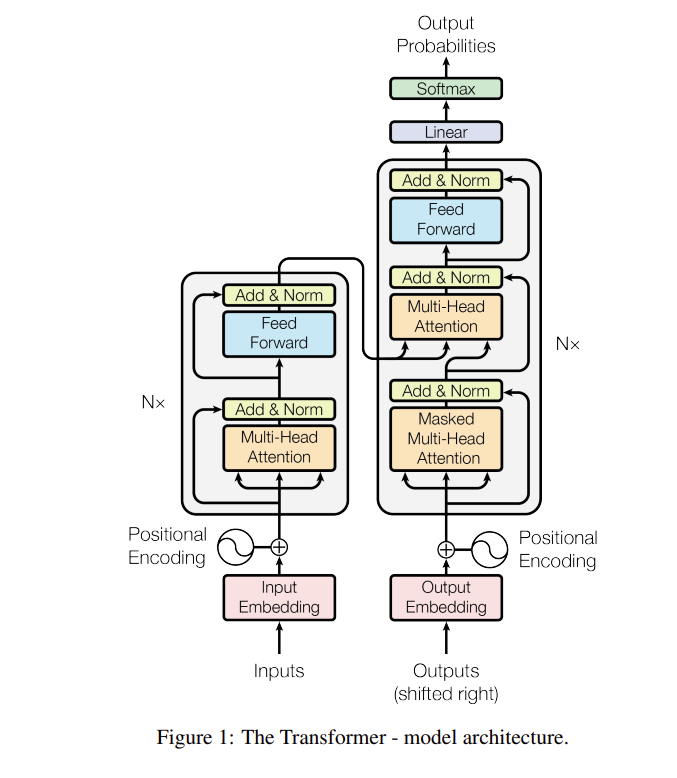

Attention!
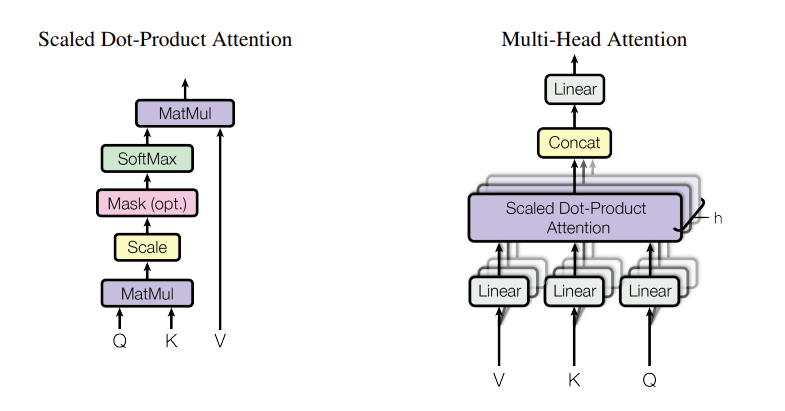

## Tasks & Models

### Question Answering:

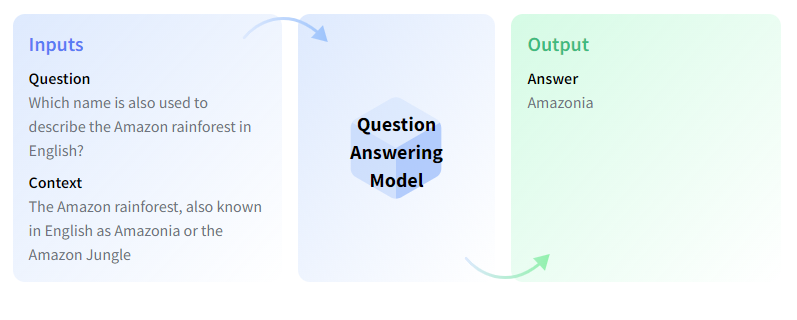

### Summarization:
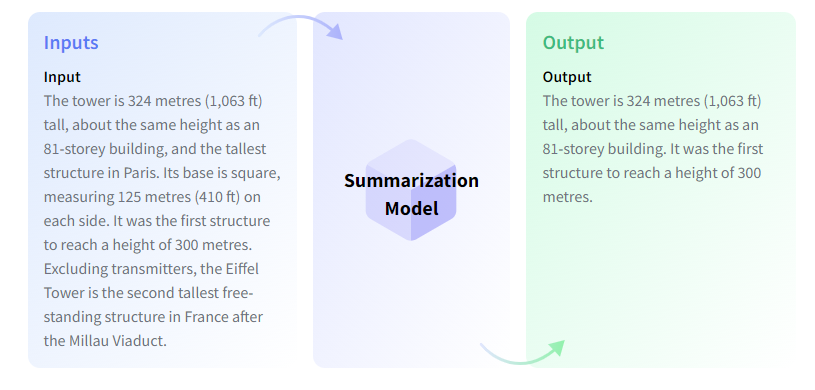

### Translation:
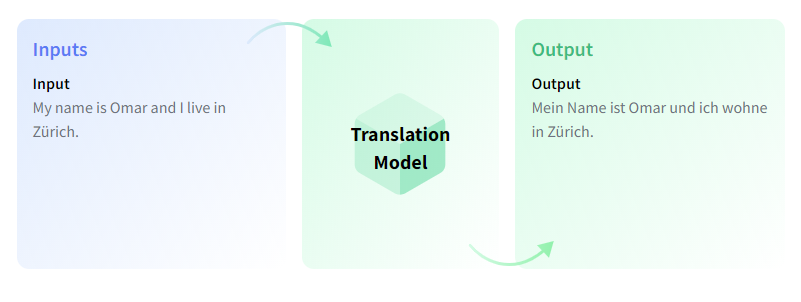

### Text Generation:
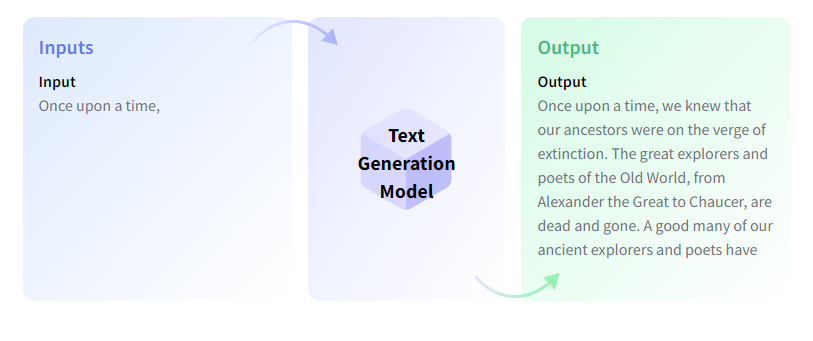

### Text Classification:
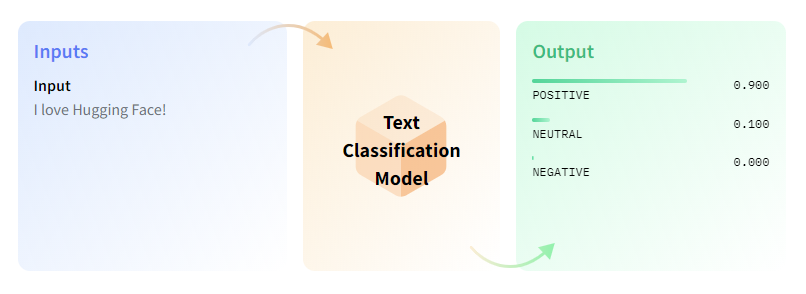

### Token Classification:
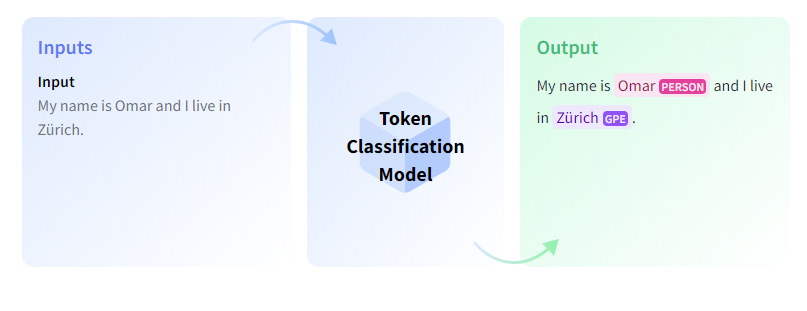

*Source: https://huggingface.co/tasks*

## Current Major Large Language Models:
https://www.techtarget.com/whatis/feature/12-of-the-best-large-language-models